In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("D:\\DATA SCIENCE\\HCL Hakathon\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df=df.drop('customerID' , axis=1)

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
len(df[df['TotalCharges']==" "])

11

In [19]:
df['TotalCharges']=df['TotalCharges'].replace({" " : "0.0"})

In [20]:
# Converting datatype of categorical columns to numerical columns
df['TotalCharges']=df['TotalCharges'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
numerical_features=['tenure' , 'MonthlyCharges' ,'TotalCharges']
for col in df.columns:
    if col not in numerical_features:
        print(col , df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


# Initial Insights from the Data
### 1.) Dropped unnecesary column like CustomerID
### 2.) During data inspection, we identified that TotalCharges column contained null values stored as empty strings ("") instead of actual NaN values so we replaced it with 0.0 and later converted TotalCharges column datatype from object to float

## EDA

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name] , kde=True)
    plt.title(f"Distribution of {column_name}")
    plt.show()

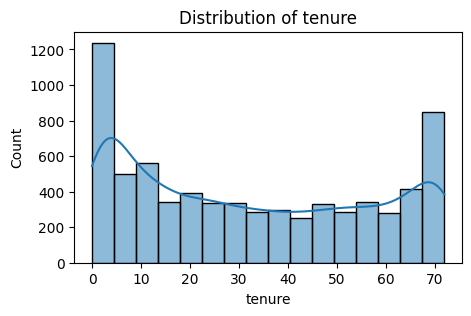

In [ ]:
plot_histogram(df,'tenure')

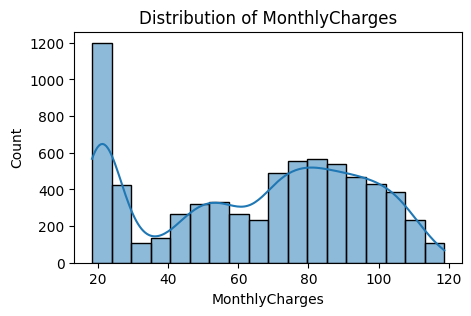

In [ ]:
plot_histogram(df,'MonthlyCharges')

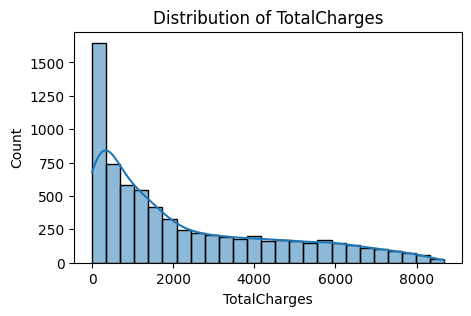

In [ ]:
plot_histogram(df,'TotalCharges')

# Checking Outliers

In [25]:
# Boxplot to check for outliers
def boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show()

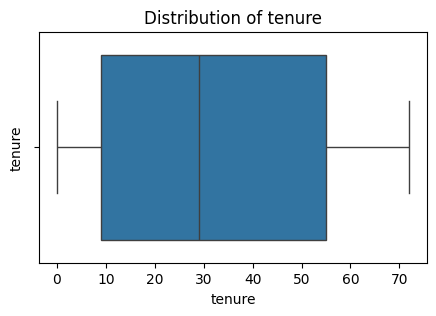

In [26]:
boxplot(df,'tenure')

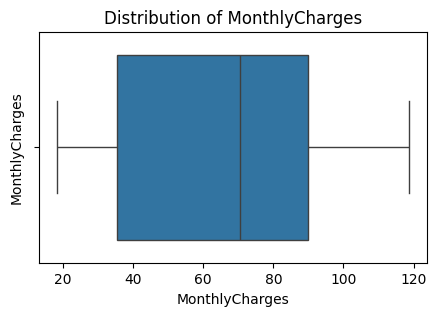

In [27]:
boxplot(df,'MonthlyCharges')

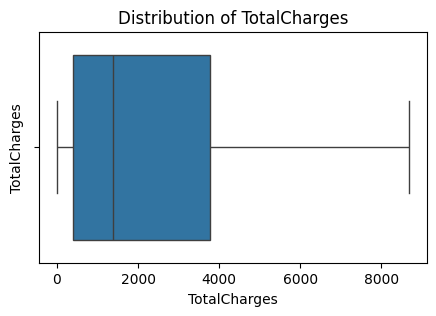

In [28]:
boxplot(df,'TotalCharges')

<Axes: >

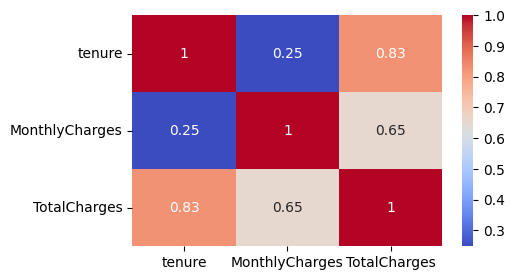

In [29]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(5,3))
sns.heatmap(df[["tenure" , "MonthlyCharges" , "TotalCharges"]].corr() ,annot=True,cmap="coolwarm")

## Analysis on the Categorical Column

In [33]:
for col in df.columns:
    if col not in numerical_features:
        print(col , df[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


# Here we converted the Numerical Column(Senior Citizen) to Categorical Column

In [30]:
object_cols = df.select_dtypes(include="object").columns.to_list()

# Senior citizen is also an object column so we have to add it as well
object_cols=["SeniorCitizen"] + object_cols

In [31]:
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# Data Visualization of Categorical Columns

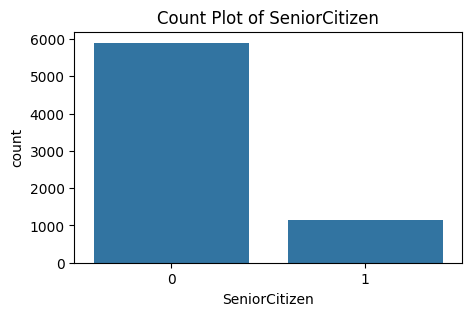

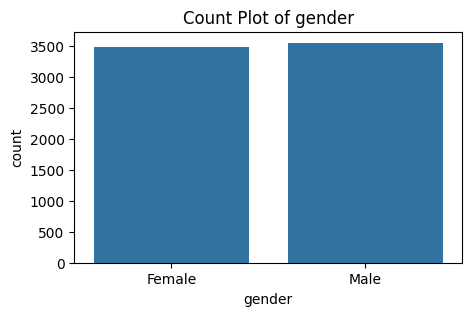

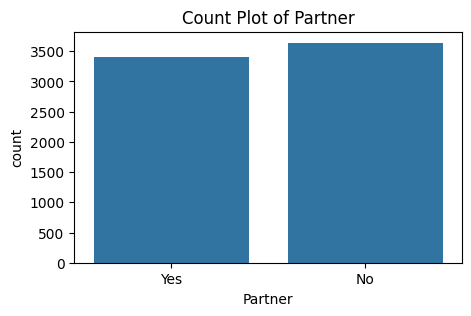

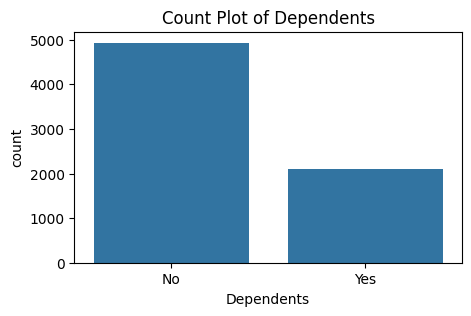

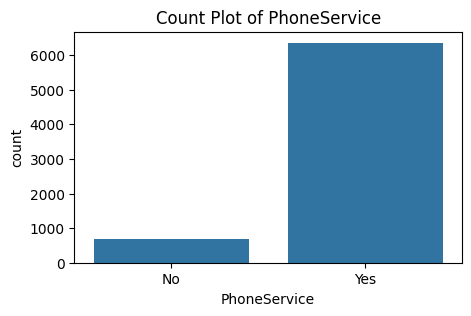

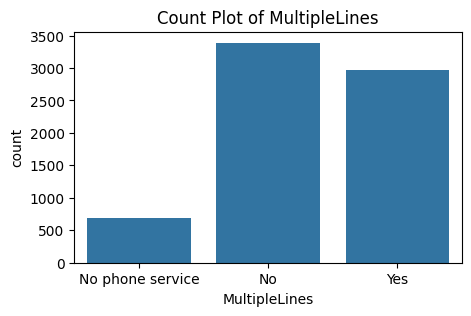

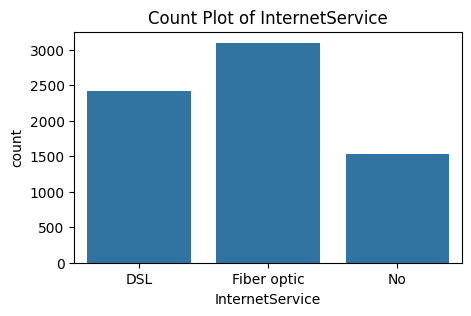

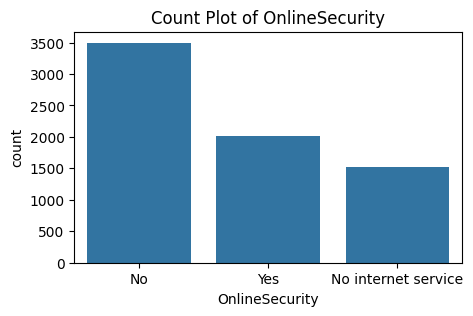

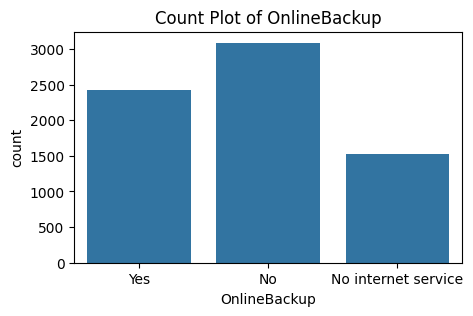

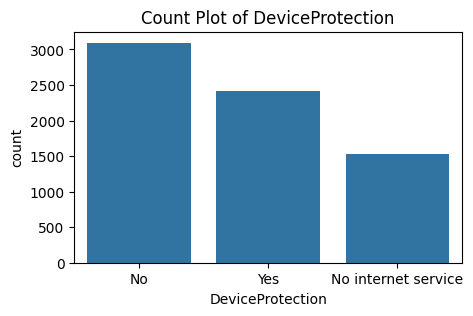

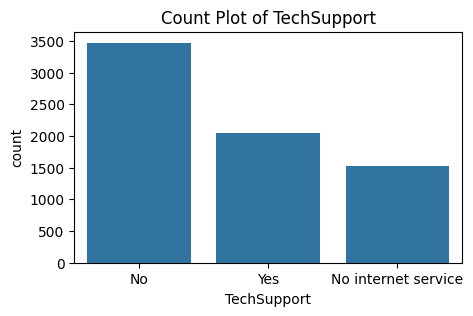

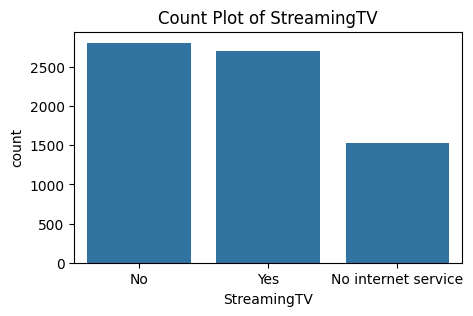

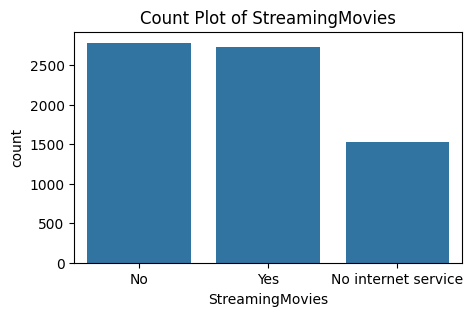

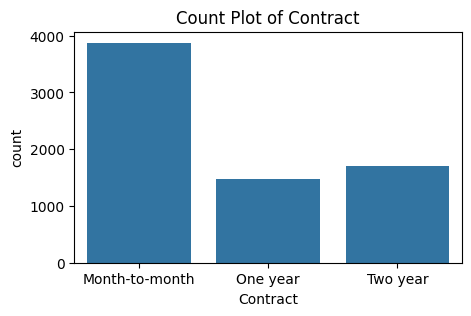

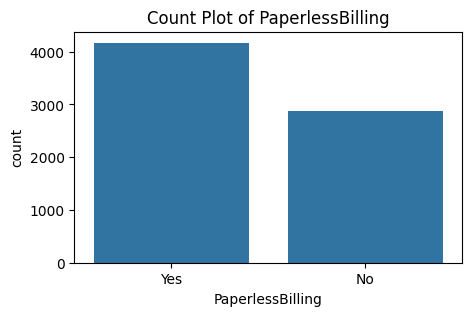

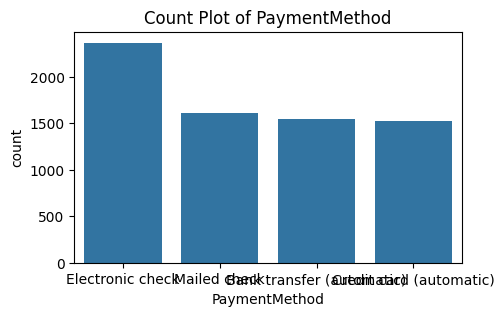

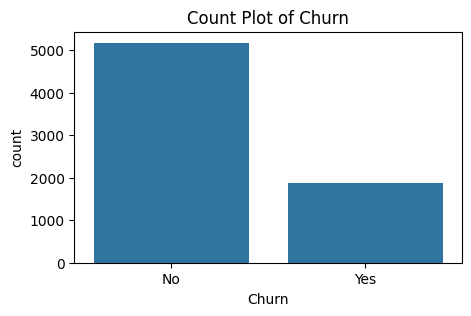

In [32]:
# Plotting Count Plot for all the categorical columns
for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

## Insights from the EDA
### 1.) There is a skew distribution in all the numerical columns
### 2.) Senior Citizen is also a categorical column but it is represented as an integer column so we have added it in the categorical column for analysis


# Feature Engineering

In [ ]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [ ]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### Target Variable imbalance can be seen

# Label Encoding for categorical columns

In [37]:
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

<Axes: >

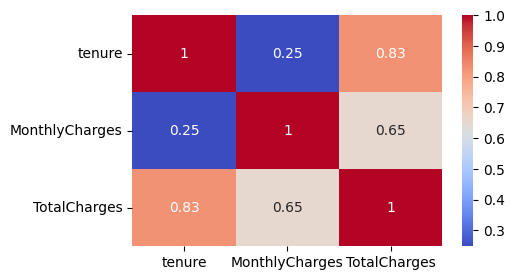

In [38]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(5,3))
sns.heatmap(df[["tenure" , "MonthlyCharges" , "TotalCharges"]].corr() ,annot=True,cmap="coolwarm")

# Feature Construction as high co-relation can be seen above

In [39]:
# Featue Construction according to domain knowledge as Total charges and tenure have a high correlation
df["ChargeRatio"] = df["MonthlyCharges"] / (df["TotalCharges"] + 1)

In [ ]:
# Applying Label encoder on all the categorical columns

import pickle
encoders = {}


for column in object_cols:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder



with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [44]:
encoders

{'SeniorCitizen': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [45]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [46]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(y_train.shape)

(5634,)


In [48]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# Feature Selection of Top 15 features using Mutual Information

In [54]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("Top 15 MI Features:\n", mi_scores.head(15))

top_15_features = mi_scores.head(15).index.tolist()

# Apply feature selection
X_train = X_train[top_15_features]
X_test = X_test[top_15_features]



Top 15 MI Features:
 Contract            0.090815
ChargeRatio         0.080998
tenure              0.077560
TechSupport         0.065210
OnlineSecurity      0.065123
InternetService     0.048697
MonthlyCharges      0.045798
PaymentMethod       0.045120
TotalCharges        0.043012
OnlineBackup        0.042068
StreamingTV         0.037797
DeviceProtection    0.033960
StreamingMovies     0.031547
PaperlessBilling    0.025001
Dependents          0.022275
dtype: float64


## Handling Imbalance using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [60]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000)
}

## K-cross Validation

[LightGBM] [Info] Number of positive: 3310, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3310, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

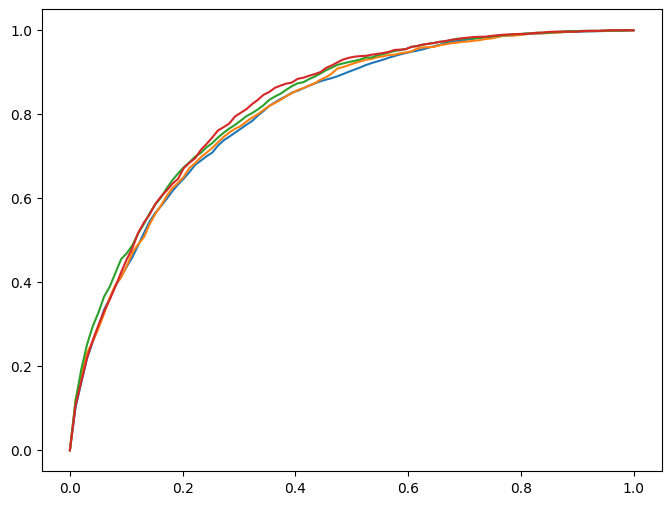

In [62]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_auc_scores = {}
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    auc_scores = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, val_idx in kf.split(X_train, y_train):
        # Train–validation split for the current fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # --- Apply SMOTE on training fold only ---
        sm = SMOTE(random_state=42)
        X_tr_sm, y_tr_sm = sm.fit_resample(X_tr, y_tr)

        # --- Train model ---
        model.fit(X_tr_sm, y_tr_sm)

        # --- Predict probabilities ---
        y_prob = model.predict_proba(X_val)[:, 1]

        # --- Compute AUC ---
        fold_auc = roc_auc_score(y_val, y_prob)
        auc_scores.append(fold_auc)

        # --- ROC curve for plotting ---
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

    # Average AUC for this model
    model_auc_scores[model_name] = np.mean(auc_scores)

    # Mean ROC Curve for plotting
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (AUC = {mean_auc:.3f})")


C:\Users\Vedant\AppData\Local\Temp\ipykernel_21444\964842463.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


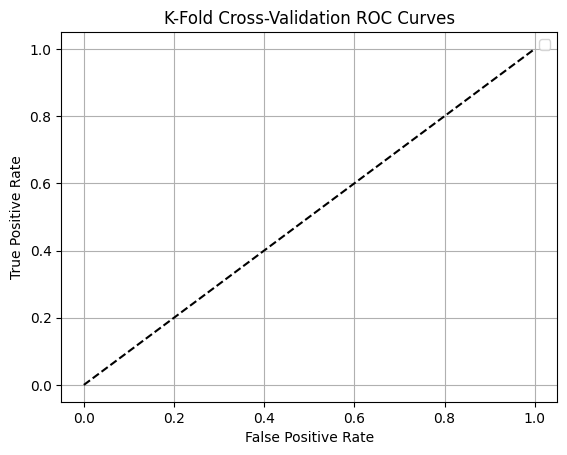


Average AUC Scores Across 5 Folds:

Random Forest: 0.8093
XGBoost: 0.8124
LightGBM: 0.8229
Logistic Regression: 0.8239


In [63]:
plt.plot([0, 1], [0, 1], "k--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-Fold Cross-Validation ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

print("\nAverage AUC Scores Across 5 Folds:\n")
for model_name, auc_score in model_auc_scores.items():
    print(f"{model_name}: {auc_score:.4f}")


In [64]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create LGBM model
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train on SMOTE balanced data
lgbm.fit(X_train_smote, y_train_smote)

# Predict
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC–AUC Score:", roc_auc_score(y_test, y_prob))


[LightGBM] [Info] Number of positive: 4138, number of negative: 4138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 8276, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.7856635911994322

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.59      0.62      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409


Confusion Matrix:
 [[874 162]
 [140 233]]

ROC–AUC Score: 0.8424505988178911


In [67]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(lgbm, f)
